# Détecter des faux billets avec Python

Dans ce projet, nous alloons construire un modèle de prédictions pour détecter de faux billets grâce à des méthodes de clustering et de régressions. Nous réaliserons : 
- Une régression linéaire pour imputer des valeurs manquantes à notre dataset plutôt que de supprimer les lignes contenant des NaN
- Une régression logistique pour prédire l'authenticité des billet (nous essayerons également d'autres algorithmes tels que le SVM ou la forêt aléatoire pour comparer les résultats) 
- Une analyse prédictive
- Des classifications automatiques pour partitionner les données à l'aide d'un K-means avant de projeter les individus sur un plan factoriel grâce à une ACP

## Importation des librairies & datas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

In [2]:
base_dir = r'C:\Users\ynore\Documents\Formation data openclassroom\Projet 10'
data = pd.read_csv(base_dir + '/billets.csv', sep = ";")

Le fichier de datas est constitué de 1 500 billets. Parmi ces 1 500 billets, 1 000 sont vrais et 500 sont faux

## 1. Analyse descriptive

In [3]:
data.head(10)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   
5        True    172.17       103.74        104.08        4.42       2.95   
6        True    172.34       104.18        103.85        4.58       3.26   
7        True    171.88       103.76        104.08        3.98       2.92   
8        True    172.47       103.92        103.67        4.00       3.25   
9        True    172.47       104.07        104.02        4.04       3.25   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  
5  112.81  
6  112.81  
7  113.08  
8  112.85  
9  113.45

Nous disposons actuellement de six informations géométriques sur les billets :
- length : la longueur du billet (en mm) ;
- height_left : la hauteur du billet (mesurée sur le côté gauche, en mm) ;
- height_right : la hauteur du billet (mesurée sur le côté droit, en mm) ;
- margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
- margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
- diagonal : la diagonale du billet (en mm)

Ainsi que d'une colone (is_genuine) précisant la nature du billet VRAI/FAUX

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


On constate qu'il nous manque des valeurs dans la colonne margin_low.

In [5]:
nan_values = data[data['margin_low'].isna()]
nan_values

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

### Traitement des valeurs manquantes :

#### Imputation des valeurs manquantes par régression linéaire 

Le modèle de régression logistique ne fonctionne pas lorsque le df contient des valeurs NaN. Seuls certains des algorithmes d'apprentissage automatique peuvent fonctionner avec des données manquantes, comme KNN, qui ignorera les valeurs avec des valeurs NaN.

En général, lorsqu'on dispose d'un ensemble de données suffisamment important et que les NAs/NANs représentent ~10% des données, nous pouvons simplement supprimer les lignes concernées. Si la suppression des données ne nous convient pas, nous devons alors envisager l'imputation. Les approches simples consistent à prendre la moyenne de la colonne et à utiliser cette valeur, ou, en cas de forte asymétrie, à utiliser la médiane. Une meilleure approche consiste à effectuer une régression ou une imputation par le plus proche voisin sur la colonne afin de prédire les valeurs manquantes. Nous allons ici choisir d'imputer les données manquantes à l'aide d'une régression linéaire. Les valeurs nulles d'une colonne seront comblées par l'ajustement d'un modèle de régression utilisant les autres colonnes de l'ensemble de données. C'est-à-dire que dans ce cas, le modèle de régression contiendra toutes les colonnes, à l'exception de margin_low dans X et de margin_low dans Y. Ensuite, après avoir rempli les valeurs dans la colonne margin_low, nous évaluerons la qualité du modèle.

##### Par régression linéaire multiple avec sklearn

In [6]:
# importation de la librairie

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
# création de 2 datasets : un sans valeurs manquantes pour l'entraînement et celui avec les valeurs manquantes pour l'application du modèle

testdf = data[data['margin_low'].isnull()==True]
traindf = data[data['margin_low'].isnull()==False]

In [8]:
# on commence d'abord par séparer notre variable dépendante(Y), des autres variables

X = traindf.drop('margin_low', 1) 
Y = traindf['margin_low']

In [9]:
from sklearn.model_selection import train_test_split

# on sépare les données en jeux d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [10]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (1316, 6)
X_test: (147, 6)
Y_train: (1316,)
Y_test: (147,)


In [11]:
# on entraîne le modèle

lr.fit(x_train,y_train)

LinearRegression()

In [12]:
# prédiction des valeurs

y_pred = lr.predict(x_test)
y_pred

array([5.22653975, 4.10526215, 4.11027633, 4.12153511, 4.04682026,
       4.16116443, 5.23911967, 4.12775122, 4.10159687, 4.18891636,
       5.21647931, 4.0349368 , 4.09162142, 4.11733253, 5.17834888,
       4.10386323, 4.06618913, 4.1788183 , 4.14691495, 5.21261379,
       4.11118018, 5.17641579, 5.28628661, 4.10722311, 4.15278683,
       4.15998353, 4.16998888, 4.14068938, 5.2395263 , 4.17837312,
       5.21288354, 4.10981009, 4.07473319, 4.14443569, 4.17770165,
       4.05265572, 4.08781645, 5.19698066, 5.19699917, 4.10386483,
       4.06795998, 4.06302338, 5.24236991, 4.07792227, 5.24860638,
       4.10708449, 5.20123635, 5.20111641, 4.07814855, 5.22717172,
       4.10357911, 4.09309585, 4.17374307, 4.1083609 , 4.13390294,
       4.15762726, 4.07250065, 4.13639781, 4.14494022, 5.22024138,
       4.08578342, 5.28158039, 4.1510441 , 4.09784776, 5.20453997,
       4.10014071, 4.12891452, 5.21420933, 5.2098584 , 4.14135856,
       5.25088905, 4.09749553, 5.2020092 , 4.10463232, 4.10263

In [13]:
from sklearn.metrics import r2_score

# Calcul de la précision

Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 64.63


##### Entraînement du modèle par overfitting (sans partitionnement des données)

Mêmes étapes que précédemment, sauf que cette fois le jeu d'entraînement est l'ensemble du df ne contenant pas de NaN et on applique ensuite la prédiction sur le df contenant les valeurs manquantes

In [14]:
# séparation variable indépendantes/dépendante

X = traindf.drop('margin_low', 1) 
Y = traindf['margin_low']

In [15]:
#entraînement du modèle

lr.fit(X,Y)

LinearRegression()

In [16]:
# application du modèle sur le df aux valeurs manquantes

testdf.drop("margin_low",axis=1,inplace=True) # on supprime d'abord la colonne dont on souhaite prédire les valeurs
pred = lr.predict(testdf)

In [17]:
# insertion des prédictions

testdf['margin_low']= pred
testdf

is_genuine  diagonal  height_left  height_right  margin_up  length  \
72          True    171.94       103.89        103.45       3.25  112.79   
99          True    171.93       104.07        104.18       3.14  113.08   
151         True    172.07       103.80        104.38       3.02  112.93   
197         True    171.45       103.66        103.80       3.62  113.27   
241         True    171.83       104.14        104.06       3.02  112.36   
251         True    171.80       103.26        102.82       2.95  113.22   
284         True    171.92       103.83        103.76       3.23  113.29   
334         True    171.85       103.70        103.96       3.00  113.36   
410         True    172.56       103.72        103.51       3.12  112.95   
413         True    172.30       103.66        103.50       3.16  112.95   
445         True    172.34       104.42        103.22       3.01  112.97   
481         True    171.81       103.53        103.96       2.71  113.99   
505         True    172.01       103.97        104.05       2.98  113.65   
611         True    171.80       103.68        103.49       3.30  112.84   
654         True    171.97       103.69        103.54       2.70  112.79   
675         True    171.60       103.85        103.91       2.56  113.27   
710         True    172.03       103.97        103.86       3.07  112.65   
739         True    172.07       103.74        103.76       3.09  112.41   
742         True    172.14       104.06        103.96       3.24  113.07   
780         True    172.41       103.95        103.79       3.13  113.41   
798         True    171.96       103.84        103.62       3.01  114.44   
844         True    171.62       104.14        104.49       2.99  113.35   
845         True    172.02       104.21        104.05       2.90  113.62   
871         True    171.37       104.07        103.75       3.07  113.27   
895         True    171.81       103.68        103.80       2.98  113.82   
919         True    171.92       103.68        103.45       2.58  113.68   
945         True    172.09       103.74        103.52       3.02  112.78   
946         True    171.63       103.87        104.66       3.27  112.68   
981         True    172.02       104.23        103.72       2.99  113.37   
1076       False    171.57       104.27        104.44       3.21  111.87   
1121       False    171.40       104.38        104.19       3.17  112.39   
1176       False    171.59       104.05        103.94       3.02  111.29   
1303       False    172.17       104.49        103.76       2.93  111.21   
1315       False    172.08       104.15        104.17       3.40  112.29   
1347       False    171.72       104.46        104.12       3.61  110.31   
1435       False    172.66       104.33        104.41       3.56  111.47   
1438       False    171.90       104.28        104.29       3.24  111.49   

      margin_low  
72      4.064954  
99      4.111990  
151     4.134003  
197     3.993571  
241     4.140399  
251     4.094284  
284     4.074124  
334     4.125390  
410     4.080728  
413     4.073633  
445     4.118973  
481     4.180380  
505     4.136484  
611     4.051068  
654     4.178377  
675     4.225551  
710     4.115868  
739     4.102841  
742     4.081843  
780     4.092762  
798     4.112502  
844     4.157176  
845     4.160288  
871     4.121938  
895     4.123536  
919     4.198423  
945     4.109623  
946     4.096960  
981     4.133841  
1076    5.259685  
1121    5.264817  
1176    5.282519  
1303    5.302069  
1315    5.200358  
1347    5.175468  
1435    5.173450  
1438    5.246751

##### Régression linéaire multiple avec Statsmodel

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=traindf).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          4.75e-299
Time:                        10:56:33   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

In [20]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=traindf).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          2.12e-300
Time:                        10:56:33   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4247      7

In [21]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=traindf).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          8.76e-302
Time:                        10:56:33   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3902      5

In [22]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+margin_up', data=traindf).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          3.63e-303
Time:                        10:56:33   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9104      4

In [23]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=traindf).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          1.24e-304
Time:                        10:56:33   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

##### Traitement des données manquantes par suppression des lignes

In [24]:
updated_df = data.dropna(axis=0)
updated_df

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1463 rows x 7 columns]

##### Insertion des résultats obtenus par overfitting

In [25]:
# on rename la colonne dans notre df avec les valeurs prédites
testdf = testdf.rename(columns={"margin_low" : "margin_low_x",
                               'diagonal' : "diagonal_x", 
                                'height_left' : "height_left_x", 
                                'height_right': "height_right_x", 
                                'margin_up': 'margin_up_x', 
                                'length': "lenght_x",
                               "is_genuine" : "is_genuine_x"})

In [26]:
# on concat les 2 df :

data = pd.concat([data, testdf], axis=1)
data

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length is_genuine_x  diagonal_x  height_left_x  height_right_x  \
0     112.83          NaN         NaN            NaN             NaN   
1     113.09          NaN         NaN            NaN             NaN   
2     113.16          NaN         NaN            NaN             NaN   
3     113.51          NaN         NaN            NaN             NaN   
4     112.54          NaN         NaN            NaN             NaN   
...      ...          ...         ...            ...             ...   
1495  111.28          NaN         NaN            NaN             NaN   
1496  110.97          NaN         NaN            NaN             NaN   
1497  111.95          NaN         NaN            NaN             NaN   
1498  112.25          NaN         NaN            NaN             NaN   
1499  112.07          NaN         NaN            NaN             NaN   

      margin_up_x  lenght_x  margin_low_x  
0             NaN       NaN           NaN  
1             NaN       NaN           NaN  
2             NaN       NaN           NaN  
3             NaN       NaN           NaN  
4             NaN       NaN           NaN  
...           ...       ...           ...  
1495          NaN       NaN           NaN  
1496          NaN       NaN           NaN  
1497          NaN       NaN           NaN  
1498          NaN       NaN           NaN  
1499          NaN       NaN           NaN  

[1500 rows x 14 columns]

In [27]:
# puis on remplit les valeurs manquantes de la colonne avec celle de la nouvelle :
data['margin_low'] = data['margin_low'].fillna(data['margin_low_x'])

# et on supprime les variables en double
data.drop(["margin_low_x", "diagonal_x", "height_left_x",'height_right_x', 'margin_up_x', 'lenght_x', "is_genuine_x"], inplace=True, axis=1)

data

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


Les valeurs manquantes ont bien été remplacées par les valeurs prédites.

Une autre approche serait de construire une forêt aléatoire de classification et de régression. Les modèles de forêts peuvent traiter de manière neutre les données manquantes en les ignorant au moment de décider des divisions. 

La bibliothèque Scipy possède également une fonction d'interpolation qui produit des points de données à partir d'une gamme de points de données discrets connus. C'est un autre moyen de combler les données manquantes.

In [29]:
data.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.482844     3.151473   
std       0.305195     0.299462      0.325627     0.659899     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.027500     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

A première vue, les dimensions des billets sont réparties de manière égale lorsqu'on compare la moyenne (mean) avec la médiane (50%). Les colonnes "maring_low" et "lenght" présentent potentiellement des outliers (fort écart entre la valeur minimale & maximale). Enfin, on observe des grands écarts d'échelle entre nos variables, nous allons devoir normaliser nos données. 

In [30]:
data.is_genuine.value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

Nous pouvons également vérifier qu'il n'existe pas de doublons dans notre df :

In [31]:
data[data.duplicated()]

Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []

Notre df ne contient pas de doublons. Regardons maintenant la distribution des individus et s'il existe de potentiels outliers. Pour cela nous allons utiliser des boxplots :

<AxesSubplot:xlabel='is_genuine', ylabel='margin_low'>

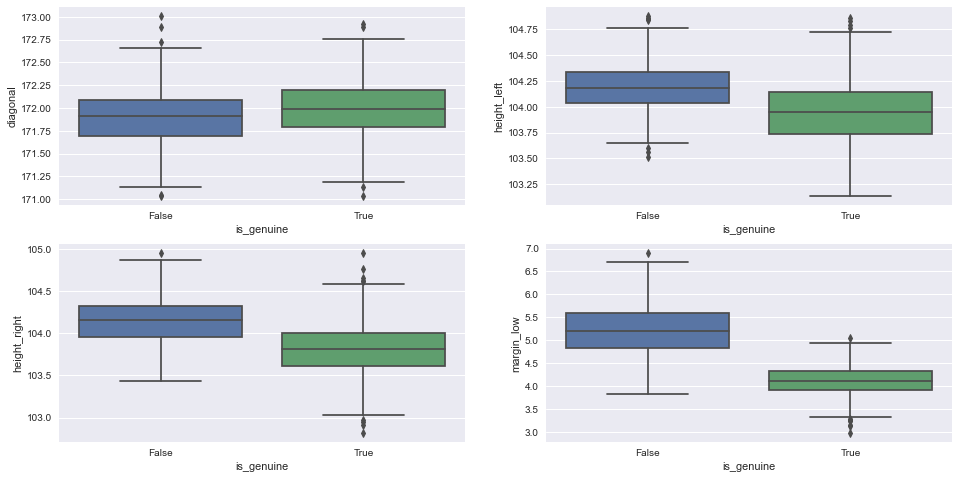

In [32]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.boxplot(x="is_genuine", y="diagonal", data=data)

plt.subplot(2,2,2)
sns.boxplot(x="is_genuine", y="height_left", data=data)

plt.subplot(2,2,3)
sns.boxplot(x="is_genuine", y="height_right", data=data)

plt.subplot(2,2,4)
sns.boxplot(x="is_genuine", y="margin_low", data=data)

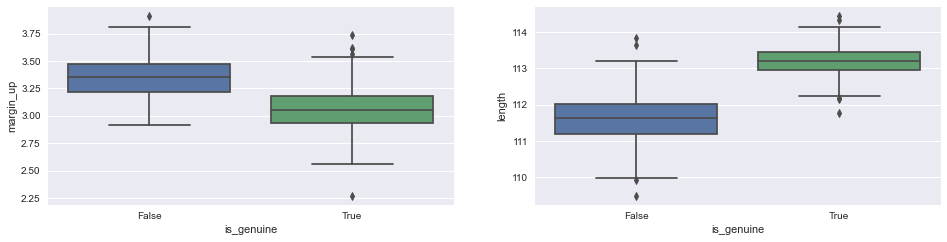

In [33]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.boxplot(x="is_genuine", y="margin_up", data=data)

plt.subplot(2,2,2)
sns.boxplot(x="is_genuine", y="length", data=data)

plt.show()

Notre dataset contient effectivement des outliers, nous allons les supprimer pour qu'ils ne viennent pas fausser l'analyse.

Nous pouvons également nous intéresser à la répartition des individus. Pour cela nous allons nous pencher sur la symétrie / asymétrie de la distribution (skewness & kurtosis). L'asymétrie est la mesure de la symétrie ou, plus précisément, de l'absence de symétrie. Par exemple, une distribution ou un ensemble de données est symétrique si elle présente la même apparence à gauche et à droite des données du point central. 

Le kurtosis, quant à lui, est la mesure de la queue lourde ou légère des données par rapport à la distribution normale. Cela signifie que les ensembles de données avec un kurtosis élevé ont tendance à avoir plus de points de données de chaque côté. 

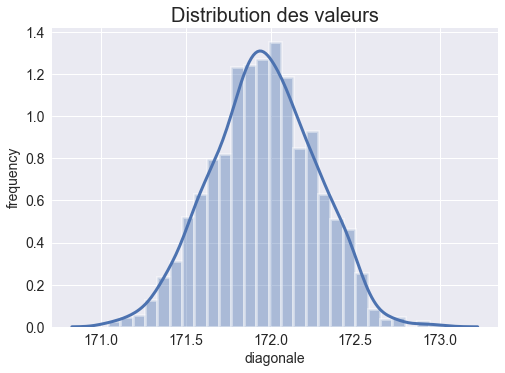

In [34]:
ax = sns.distplot(data.diagonal, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('diagonale', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution des valeurs', fontsize=20);

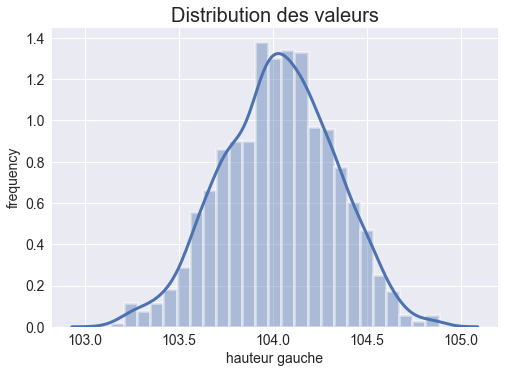

In [35]:
ax = sns.distplot(data.height_left, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('hauteur gauche', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution des valeurs', fontsize=20);

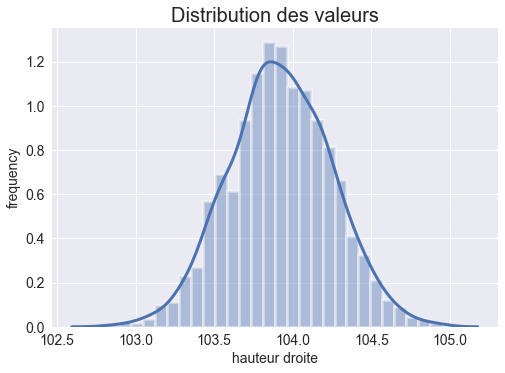

In [36]:
ax = sns.distplot(data.height_right, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('hauteur droite', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution des valeurs', fontsize=20);

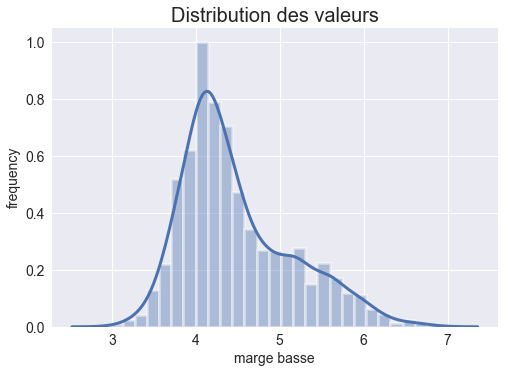

In [37]:
ax = sns.distplot(data.margin_low, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('marge basse', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution des valeurs', fontsize=20);

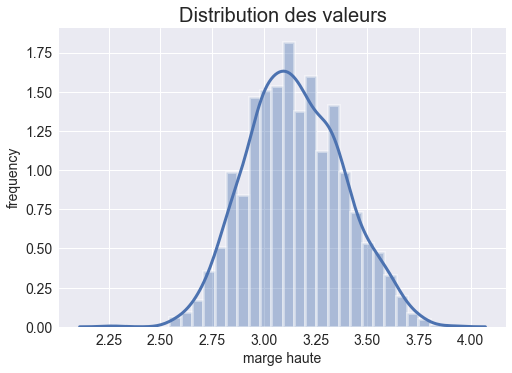

In [38]:
ax = sns.distplot(data.margin_up, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('marge haute', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution des valeurs', fontsize=20);

D'après les graphiques ci-dessus, nous pouvons voir que les données sont centrées sur la moyenne et suivent une distribution normale. La valeur allant vers la gauche de la moyenne est décroissante alors qu'elle est croissante vers la droite. Supprimons maintenant les outliers identifiés précédemment à l'aide de la méthode du z-score.

Ce score permet de comprendre si une valeur de données est supérieure ou inférieure à la moyenne et à quel point elle s'en éloigne. Plus précisément, le score Z indiquede combien d'écarts types un point de données est éloigné de la moyenne. Ils nous permettra donc d'identifier les outliers par rapport à la moyenne.

Il se calcule de la manière suivante : Z score = (x -mean) / std. deviation
- mean correspond à la moyenne
- std est l'écart type empirique : il s'agit d'une mesure de la quantité de variation ou de dispersion d'un ensemble de valeurs. Un faible écart-type indique que les valeurs ont tendance à être proches de la moyenne de l'ensemble, tandis qu'un écart-type élevé indique que les valeurs sont réparties sur une plus grande plage.

In [39]:
# définition des limites pour la variable :

upper = data.diagonal.mean() + 3 * data.diagonal.std()
lower = data.diagonal.mean() -3*data.diagonal.std()

print(upper)
print(lower)

172.8740253657493
171.0428546342503


In [40]:
#application des limites pour exclure les outliers et nouveau df : 

new_data = data[(data.diagonal<upper) & (data.diagonal>lower)]
new_data.shape

(1494, 7)

In [41]:
# Maintenant, il s'agit de répéter l'opération pour chaque variable :

upper = new_data.height_left.mean() + 3 * new_data.height_left.std()
lower = new_data.height_left.mean() -3*new_data.height_left.std()

print(upper)
print(lower)

104.92752859918347
103.13176189613101


In [42]:
new_data = new_data[(new_data.height_left<upper) & (new_data.height_left>lower)]
new_data.shape

(1494, 7)

In [43]:
upper = new_data.height_right.mean() + 3 * new_data.height_right.std()
lower = new_data.height_right.mean() -3*new_data.height_right.std()

print(upper)
print(lower)

104.89723294926908
102.94223157549659


In [44]:
new_data = new_data[(new_data.height_right<upper) & (new_data.height_right>lower)]
new_data.shape

(1490, 7)

In [45]:
upper = new_data.margin_low.mean() + 3 * new_data.margin_low.std()
lower = new_data.margin_low.mean() -3*new_data.margin_low.std()

print(upper)
print(lower)

6.461441493085366
2.5016623246403844


In [46]:
new_data = new_data[(new_data.margin_low<upper) & (new_data.margin_low>lower)]
new_data.shape

(1481, 7)

In [47]:
upper = new_data.margin_up.mean() + 3 * new_data.margin_up.std()
lower = new_data.margin_up.mean() -3*new_data.margin_up.std()

print(upper)
print(lower)

3.845756167875036
2.4548650340155675


In [48]:
new_data = new_data[(new_data.margin_up<upper) & (new_data.margin_up>lower)]
new_data.shape

(1479, 7)

In [49]:
upper = new_data.length.mean() + 3 * new_data.length.std()
lower = new_data.length.mean() -3 * new_data.length.std()

print(upper)
print(lower)

115.29266355310381
110.0803858045704


In [50]:
new_data = new_data[(new_data.length<upper) & (new_data.length>lower)]
new_data.shape

(1476, 7)

In [51]:
# Jettons un coup d'oeil à notre ratio vrai/faux billets :

new_data["is_genuine"].value_counts()

True     993
False    483
Name: is_genuine, dtype: int64

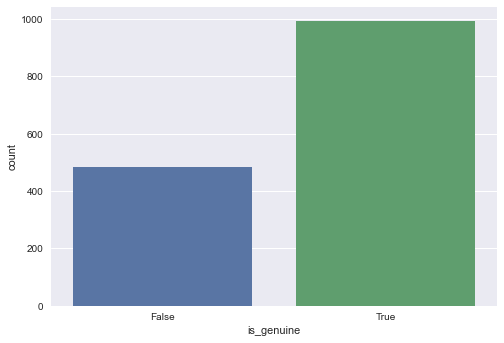

In [52]:
sns.countplot(x='is_genuine', data = new_data)
plt.show()

In [53]:
# calcul de la répartition vrai/faux en % :

true_bill = len(new_data[new_data['is_genuine']== True])
false_bill = len(new_data[new_data['is_genuine']==False])
pct_of_true = true_bill/(true_bill+false_bill)
print("% de vrais billets:", pct_of_true*100)
pct_of_false = false_bill/(true_bill+false_bill)
print("% de faux billets:", pct_of_false*100)

% de vrais billets: 67.27642276422763
% de faux billets: 32.72357723577235


Une matrice de corrélation est un moyen simple de résumer les corrélations entre toutes les variables d'un ensemble de données et elle pourra nous servir de diagnostic pour la régression. En effet, une hypothèse clé de la régression linéaire multiple est qu'aucune variable indépendante du modèle n'est fortement corrélée à une autre variable du modèle. Lorsque deux variables indépendantes sont fortement corrélées, il en résulte un problème connu sous le nom de multicollinéarité et cela peut rendre difficile l'interprétation des résultats de la régression. L'une des façons les plus simples de détecter un problème potentiel de multicollinéarité est de regarder une matrice de corrélation et de vérifier visuellement si l'une des variables est fortement corrélée à l'autre.

Notre matrice sera composée de valeurs comprises entre -1 et 1 où :

- 1 indique une corrélation linéaire parfaitement négative entre deux variables.
- 0 indique une absence de corrélation linéaire entre deux variables
- 1 indique une corrélation linéaire parfaitement positive entre deux variables.
Plus le coefficient de corrélation est éloigné de zéro, plus la relation entre les deux variables est forte.

Pour cela nous pouvons utiliser une représentation en heatmap.

<AxesSubplot:>

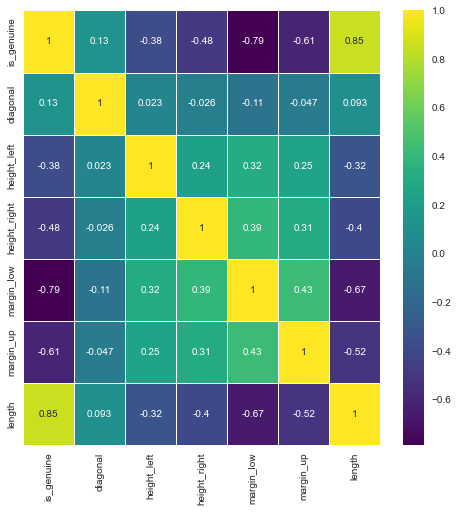

In [54]:
plt.figure(figsize=(8,8))
sns.heatmap(new_data.corr(), annot=True, cmap = "viridis", linewidths= 0.5)

In [55]:
new_data.corr()

is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine      1.000000  0.131563    -0.380825     -0.484511   -0.788185   
diagonal        0.131563  1.000000     0.023413     -0.026413   -0.108304   
height_left    -0.380825  0.023413     1.000000      0.237373    0.315089   
height_right   -0.484511 -0.026413     0.237373      1.000000    0.386613   
margin_low     -0.788185 -0.108304     0.315089      0.386613    1.000000   
margin_up      -0.607535 -0.046712     0.247711      0.306403    0.433376   
length          0.849961  0.092910    -0.323444     -0.401919   -0.667594   

              margin_up    length  
is_genuine    -0.607535  0.849961  
diagonal      -0.046712  0.092910  
height_left    0.247711 -0.323444  
height_right   0.306403 -0.401919  
margin_low     0.433376 -0.667594  
margin_up      1.000000 -0.520718  
length        -0.520718  1.000000

Il existe effectivement une forte corrélation positive entre l'authenticité d'un billet et sa longueur, et une corrélation négative assez prononcée entre l'authenticité d'un billet et sa marge basse. Profitons en pour voir si il existe déjà des couples de variables nous permettant de séparer les 2 groupes :

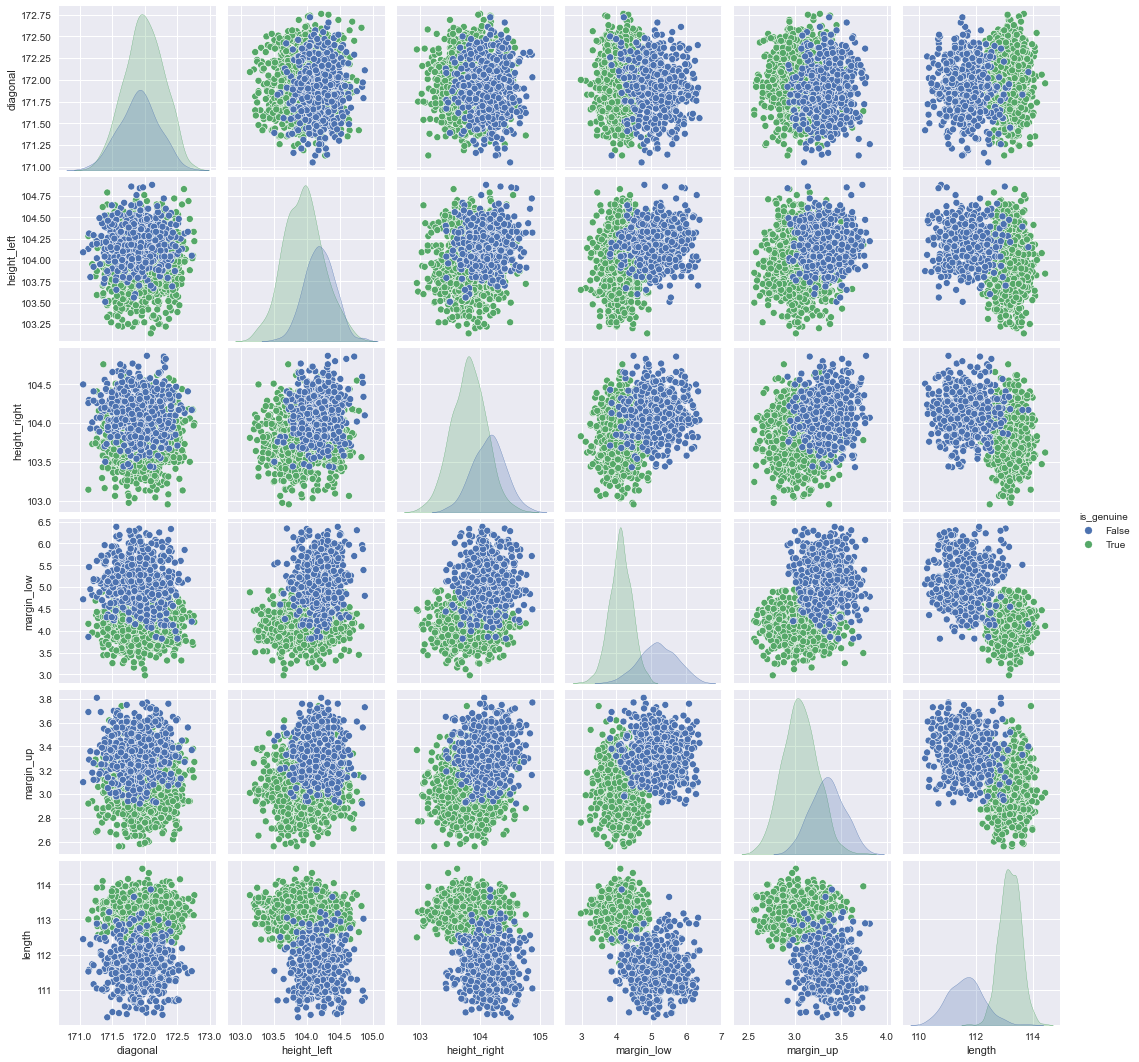

In [56]:
sns.pairplot(data = new_data, hue='is_genuine')

On constate que nos groupes sont assez bien séparés, particulièrement, les variables lenght & margin low semblent les plus importantes.

## 2. Application des algorithmes

In [57]:
# séparation des données x & y qui viendront nourrir le modèle :

X = new_data.drop(["is_genuine"], axis =1)
y = new_data["is_genuine"]

### A. Standardisation des données

In [58]:
# Nous allons standardiser les données une fois celles-ci séparées en jeu d'entraînement et de test : 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
print(X_train.shape)
print(X_test.shape)

(1033, 6)
(443, 6)


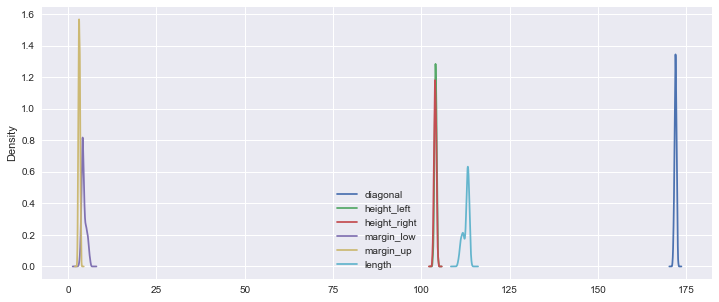

In [60]:
# données d'origine : 

fig0 = X_train.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.show(fig0)

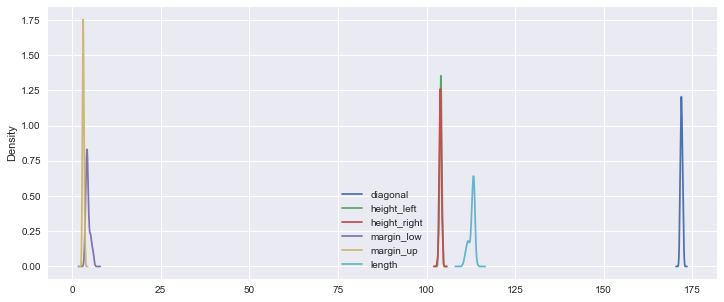

In [61]:
fig2 = X_test.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.show(fig2)

In [62]:
from sklearn import preprocessing

# Centrage et Réduction

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

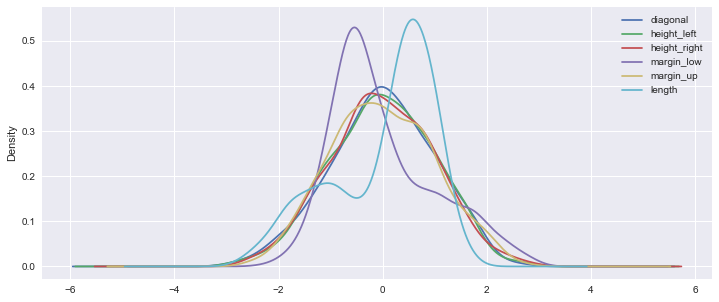

In [63]:
# vérification :

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

fig3 = X_train_scaled.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.show(fig3)

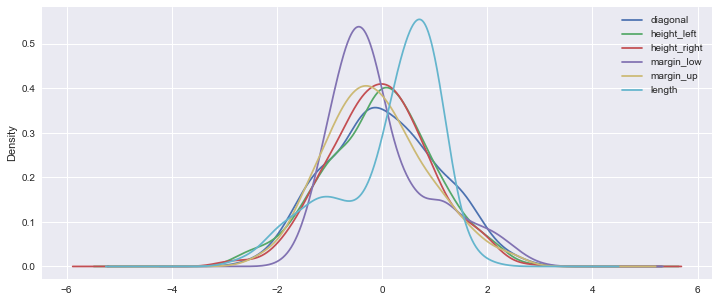

In [64]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

fig4 = X_test_scaled.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.show(fig4)

### B. Régression logistique :

La régression logistique est un algorithme de classification par apprentissage automatique qui est utilisé pour prédire la probabilité d'une variable dépendante catégorique. Dans la régression logistique, la variable dépendante est une variable binaire qui contient des données codées 1 (oui, succès, etc.) ou 0 (non, échec, etc.).

Hypothèses de la régression logistique :
- La régression logistique binaire exige que la variable dépendante soit binaire.
- Pour une régression binaire, le niveau de facteur 1 de la variable dépendante doit représenter le résultat souhaité.
- Seules les variables significatives doivent être incluses.
- Les variables indépendantes doivent être indépendantes les unes des autres. Autrement dit, le modèle doit présenter peu ou pas de multicollinéarité.
- Les variables indépendantes sont liées linéairement aux probabilités logarithmiques.
- La régression logistique nécessite des échantillons de taille assez importante.

In [65]:
# importation du module

from sklearn.linear_model import LogisticRegression

In [66]:
# définition de la fonction et entraînement du modèle

lr = LogisticRegression(solver='liblinear',random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [67]:
# on réalise les prédiction

y_train_hat = lr.predict(X_train_scaled)
y_test_hat = lr.predict(X_test_scaled)

On peut désormais évaluer les performances du modèle à l'aide de différents outils : mesure de la précision, matrice de confusion, ROC score et mesure du taux de recall/precision/f1 score

In [68]:
# importation des modules que nous allons utiliser :
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [69]:
# on génère le rapport :

print('Test performance')
print("------------------------------------------------------------")
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print("------------------------------------------------------------")
print(roc_auc_score(y_test, y_test_hat))
print('')

print("Confusion matrix")
print("------------------------------------------------------------")
print(confusion_matrix(y_test, y_test_hat))
print('')

print("Accuracy score")
print("------------------------------------------------------------")
print("test data accuracy score:", accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:", accuracy_score(y_train, y_train_hat)*100)

Test performance
------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       129
        True       0.99      1.00      1.00       314

    accuracy                           0.99       443
   macro avg       0.99      0.99      0.99       443
weighted avg       0.99      0.99      0.99       443

Roc_auc score
------------------------------------------------------------
0.9906557053276057

Confusion matrix
------------------------------------------------------------
[[127   2]
 [  1 313]]

Accuracy score
------------------------------------------------------------
test data accuracy score: 99.32279909706546
train data accuracy score: 99.22555663117134


- Le recall, ou sensibilité, est le taux de vrais positifs, c’est à dire la proportion de positifs que l’on a correctement identifiés.
- La précision correspond à la proportion de prédictions correctes parmi les points que l’on a prédits positifs.
- Le score F1 combine la précision et le rappel d'un classificateur en une seule mesure en prenant leur moyenne harmonique. Il est principalement utilisé pour comparer les performances de deux classifieurs. Supposons que le classificateur A a un rappel plus élevé, et que le classificateur B a une précision plus élevée. Dans ce cas, les scores F1 des deux classificateurs peuvent être utilisés pour déterminer lequel produit de meilleurs résultats.
- Accuracy : c'est la mesure de tous les cas correctement identifiés. 

La matrice de confusion est un tableau souvent utilisé pour décrire les performances d'un modèle de classification (ou "classificateur") sur un ensemble de données de test dont les valeurs réelles sont connues. Elle nous permet d'identifier le nombre de : 
- Vrais positifs : la valeur réelle et la valeur prédite sont vraies > vrai billet prédit comme vrai
- Faux négatifs : Dans le cas d'un faux négatif, la valeur réelle est vraie, mais la valeur prédite est fausse > vrai billet prédit comme faux
- Faux positif : Il s'agit du cas où la valeur prédite est vraie, mais où la valeur réelle est fausse > faux billet prédit comme vrai
- Vrai négatif : Il s'agit du cas où la valeur réelle est fausse et où la valeur prédite est également fausse > faux billet prédit faux.

Dans notre cas, l'algorithme a bien prédit 127 billets sur 129 comme étant faux (2 erreurs donc) et 313 billets sur 314 comme vrais (1 seule erreur)

La courbe ROC est une mesure de performance pour les problèmes de classification à différents seuils. La courbe ROC est une courbe de probabilité et l'AUC représente le degré ou la mesure de la séparabilité. Elle indique dans quelle mesure le modèle est capable de faire la distinction entre les classes. Ici, nous ne calculerons que le score AUC. Plus il est élevé, plus le modèle est capable de prédire que les classes 0 sont 0 et les classes 1 sont 1.

On constate donc que notre algorithme réalise ici un travail extrêmement précis avec un taux d'accuracy de presque 100% et un score AUC de 99%. Nous pouvons donc l'utiliser pour prédire des données issues de nouveaux datasets. Faisons un essai :

In [70]:
# testons notre modèle sur un nouveau jeu de données :

test = pd.read_csv(base_dir + '/billets_production.csv', sep = ",")

In [71]:
test = test.set_index('id')
test

diagonal  height_left  height_right  margin_low  margin_up  length
id                                                                     
A_1    171.76       104.01        103.54        5.21       3.30  111.42
A_2    171.87       104.17        104.13        6.00       3.31  112.09
A_3    172.00       104.58        104.29        4.99       3.39  111.57
A_4    172.49       104.55        104.34        4.44       3.03  113.20
A_5    171.65       103.63        103.56        3.77       3.16  113.33

In [72]:
# ne pas oublier de standardiser les données :

test_scaled = scaler.transform(test)

In [73]:
# On réalise la prédiction 

predicted_value = lr.predict(test_scaled)
predicted_proba = lr.predict_proba(test_scaled)
test["prediction"] = predicted_value
test["proba vrai"] = predicted_proba[:,1]
test["prediction"] = test["prediction"].apply(lambda x :"Vrai billet" if x == 1 else "Faux billet" )
test

diagonal  height_left  height_right  margin_low  margin_up  length  \
id                                                                        
A_1    171.76       104.01        103.54        5.21       3.30  111.42   
A_2    171.87       104.17        104.13        6.00       3.31  112.09   
A_3    172.00       104.58        104.29        4.99       3.39  111.57   
A_4    172.49       104.55        104.34        4.44       3.03  113.20   
A_5    171.65       103.63        103.56        3.77       3.16  113.33   

      prediction  proba vrai  
id                            
A_1  Faux billet    0.001305  
A_2  Faux billet    0.000164  
A_3  Faux billet    0.000330  
A_4  Vrai billet    0.967395  
A_5  Vrai billet    0.999676

On notera l'utilisation de la fonction .predict_proba(). Elle renvoie un tableau numpy de deux colonnes. La première colonne est la probabilité que la cible = 0 (donc faux billet) et la deuxième colonne est la probabilité que la cible = 1 (vrai billet). C'est pourquoi nous ajoutons [:,1] après predict_proba() afin d'obtenir les probabilités de la cible = 1. Cela nous permet ici d'obtenir des informations en plus sur la façon dont l'algorithme a évalué l'authenticité du billet.

Nous pouvons maintenant sauvegarder le modèle à l'aide du module pickle. Il permet de sauvegarder dans un fichier, au format binaire, n'importe quel objet Python. Nous pourrons ensuite le réutiliser autant de fois que nécessaire pour réaliser de nouvelles prédictions

In [74]:
# importation du module
import pickle

# sauvegarde du module
filename = 'finalized_model_lr.sav'
pickle.dump(lr, open(filename, 'wb'))

In [75]:
# exemple sur le jeu test, on charge le module, puis on réalise la prédiction

loaded_model = pickle.load(open(filename, 'rb'))
Ypredict = loaded_model.predict(test_scaled)

In [76]:
# le modèle nous renvoit un array avec la prédiction sur les données du jeu test

Ypredict

array([False, False, False,  True,  True])

In [77]:
# exemple sur un nouveau jeu :
test_billet = pd.read_csv(base_dir + '/test_billet.csv', sep = ";")

In [78]:
test_billet

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0         True    171.68       103.90        103.68        3.78       2.74   
1         True    171.74       103.90        103.60        3.87       2.89   
2         True    172.21       104.42        103.53        4.48       3.05   
3         True    171.79       103.69        103.68        3.65       2.77   
4         True    171.91       103.73        103.51        4.60       3.10   
5         True    172.11       104.12        103.83        3.90       2.72   
6         True    171.66       103.92        103.47        4.26       2.83   
7         True    172.16       103.72        103.61        4.30       2.72   
8         True    171.78       103.38        104.22        4.23       3.07   
9         True    171.44       103.96        103.92        3.68       2.89   
10        True    171.56       104.07        103.58        3.55       3.02   
11       False    172.28       103.95        103.91        4.78       3.31   
12       False    171.92       103.86        104.30        4.96       3.13   
13       False    171.59       104.14        104.38        4.97       3.47   
14       False    172.02       104.33        104.33        5.19       3.21   
15       False    172.55       104.25        104.23        5.60       3.13   
16       False    171.88       104.30        104.18        5.34       3.33   
17       False    171.63       104.05        104.25        4.61       3.10   
18       False    171.83       104.13        104.52        4.94       3.27   
19       False    172.30       104.28        103.90        5.10       3.57   

    length  
0   113.60  
1   113.36  
2   113.11  
3   112.78  
4   113.53  
5   113.28  
6   113.20  
7   113.51  
8   113.77  
9   113.21  
10  112.96  
11  111.40  
12  111.29  
13  111.22  
14  111.99  
15  111.72  
16  112.69  
17  110.91  
18  111.72  
19  110.66

In [79]:
# mélangeons un peu les données
test_billet = test_billet.sample(frac=1).reset_index(drop=True)
test_billet

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        False    171.92       103.86        104.30        4.96       3.13   
1        False    171.88       104.30        104.18        5.34       3.33   
2         True    171.74       103.90        103.60        3.87       2.89   
3         True    172.16       103.72        103.61        4.30       2.72   
4        False    172.02       104.33        104.33        5.19       3.21   
5         True    171.66       103.92        103.47        4.26       2.83   
6         True    172.21       104.42        103.53        4.48       3.05   
7        False    171.59       104.14        104.38        4.97       3.47   
8         True    171.44       103.96        103.92        3.68       2.89   
9         True    171.56       104.07        103.58        3.55       3.02   
10        True    171.68       103.90        103.68        3.78       2.74   
11        True    171.78       103.38        104.22        4.23       3.07   
12       False    172.28       103.95        103.91        4.78       3.31   
13       False    172.30       104.28        103.90        5.10       3.57   
14        True    172.11       104.12        103.83        3.90       2.72   
15       False    172.55       104.25        104.23        5.60       3.13   
16       False    171.83       104.13        104.52        4.94       3.27   
17        True    171.79       103.69        103.68        3.65       2.77   
18        True    171.91       103.73        103.51        4.60       3.10   
19       False    171.63       104.05        104.25        4.61       3.10   

    length  
0   111.29  
1   112.69  
2   113.36  
3   113.51  
4   111.99  
5   113.20  
6   113.11  
7   111.22  
8   113.21  
9   112.96  
10  113.60  
11  113.77  
12  111.40  
13  110.66  
14  113.28  
15  111.72  
16  111.72  
17  112.78  
18  113.53  
19  110.91

In [80]:
#on supprime la colonne sur laquelle on veut effectuer la prédiction (variable dépendante):
Y = test_billet["is_genuine"]
X_test_billet = test_billet.drop(columns=["is_genuine"])

In [81]:
# on n'oublie pas de standardiser les données :
test_billet_scaled = scaler.transform(X_test_billet)

In [82]:
# on réalise la prédiction :
Ypredict = loaded_model.predict(test_billet_scaled)

In [83]:
print('Test performance')
print("------------------------------------------------------------")
print(classification_report(Y, Ypredict))

print('Roc_auc score')
print("------------------------------------------------------------")
print(roc_auc_score(Y, Ypredict))
print('')

print("Confusion matrix")
print("------------------------------------------------------------")
print(confusion_matrix(Y, Ypredict))
print('')

print("Accuracy score")
print("------------------------------------------------------------")
print("test data accuracy score:", accuracy_score(Y, Ypredict)*100)

Test performance
------------------------------------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         9
        True       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Roc_auc score
------------------------------------------------------------
1.0

Confusion matrix
------------------------------------------------------------
[[ 9  0]
 [ 0 11]]

Accuracy score
------------------------------------------------------------
test data accuracy score: 100.0


In [84]:
# puis on insère la prédiction dans le df d'origine 
test_billet['prediction'] = Ypredict
test_billet

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        False    171.92       103.86        104.30        4.96       3.13   
1        False    171.88       104.30        104.18        5.34       3.33   
2         True    171.74       103.90        103.60        3.87       2.89   
3         True    172.16       103.72        103.61        4.30       2.72   
4        False    172.02       104.33        104.33        5.19       3.21   
5         True    171.66       103.92        103.47        4.26       2.83   
6         True    172.21       104.42        103.53        4.48       3.05   
7        False    171.59       104.14        104.38        4.97       3.47   
8         True    171.44       103.96        103.92        3.68       2.89   
9         True    171.56       104.07        103.58        3.55       3.02   
10        True    171.68       103.90        103.68        3.78       2.74   
11        True    171.78       103.38        104.22        4.23       3.07   
12       False    172.28       103.95        103.91        4.78       3.31   
13       False    172.30       104.28        103.90        5.10       3.57   
14        True    172.11       104.12        103.83        3.90       2.72   
15       False    172.55       104.25        104.23        5.60       3.13   
16       False    171.83       104.13        104.52        4.94       3.27   
17        True    171.79       103.69        103.68        3.65       2.77   
18        True    171.91       103.73        103.51        4.60       3.10   
19       False    171.63       104.05        104.25        4.61       3.10   

    length  prediction  
0   111.29       False  
1   112.69       False  
2   113.36        True  
3   113.51        True  
4   111.99       False  
5   113.20        True  
6   113.11        True  
7   111.22       False  
8   113.21        True  
9   112.96        True  
10  113.60        True  
11  113.77        True  
12  111.40       False  
13  110.66       False  
14  113.28        True  
15  111.72       False  
16  111.72       False  
17  112.78        True  
18  113.53        True  
19  110.91       False

### C. Support Vector Machines (SVM)

Une machine à vecteurs de support (SVM) est un modèle d'apprentissage automatique supervisé qui utilise des algorithmes de classification pour les problèmes de classification à deux groupes. Après avoir donné à un modèle SVM des ensembles de données d'entraînement étiquetées pour chaque catégorie, il est capable de classer des nouvelles données.

In [85]:
from sklearn.svm import SVC

In [86]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_train_hat = svm.predict(X_train_scaled)
y_test_hat = svm.predict(X_test_scaled)

In [87]:
print('Test performance')
print("------------------------------------------------------------")
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print("------------------------------------------------------------")
print(roc_auc_score(y_test, y_test_hat))
print('')

print("Confusion matrix")
print("------------------------------------------------------------")
print(confusion_matrix(y_test, y_test_hat))
print('')

print("Accuracy score")
print("------------------------------------------------------------")
print("test data accuracy score:", accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:", accuracy_score(y_train, y_train_hat)*100)

Test performance
------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       129
        True       0.99      1.00      1.00       314

    accuracy                           0.99       443
   macro avg       0.99      0.99      0.99       443
weighted avg       0.99      0.99      0.99       443

Roc_auc score
------------------------------------------------------------
0.9906557053276057

Confusion matrix
------------------------------------------------------------
[[127   2]
 [  1 313]]

Accuracy score
------------------------------------------------------------
test data accuracy score: 99.32279909706546
train data accuracy score: 99.32236205227493


##### Prédiction sur le nouveau jeu de données 

In [88]:
predicted_value = svm.predict(test_scaled)
test["prediction"] = predicted_value
test["prediction"] = test["prediction"].apply(lambda x :"Vrai billet" if x == 1 else "Faux billet" )
test

diagonal  height_left  height_right  margin_low  margin_up  length  \
id                                                                        
A_1    171.76       104.01        103.54        5.21       3.30  111.42   
A_2    171.87       104.17        104.13        6.00       3.31  112.09   
A_3    172.00       104.58        104.29        4.99       3.39  111.57   
A_4    172.49       104.55        104.34        4.44       3.03  113.20   
A_5    171.65       103.63        103.56        3.77       3.16  113.33   

      prediction  proba vrai  
id                            
A_1  Faux billet    0.001305  
A_2  Faux billet    0.000164  
A_3  Faux billet    0.000330  
A_4  Vrai billet    0.967395  
A_5  Vrai billet    0.999676

In [89]:
filename1 = 'finalized_model_svm.sav'
pickle.dump(svm, open(filename1, 'wb'))

In [90]:
# loaded_model = pickle.load(open(filename1, 'rb'))
# Ypredict = loaded_model.predict(test_scaled)
# Ypredict

### D. Random Forest Classifier

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf = RandomForestClassifier(n_jobs = -1, random_state=42)
rf.fit(X_train_scaled, y_train)
y_train_hat = rf.predict(X_train_scaled)
y_test_hat = rf.predict(X_test_scaled)

In [93]:
print('Test performance')
print("------------------------------------------------------------")
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print("------------------------------------------------------------")
print(roc_auc_score(y_test, y_test_hat))
print('')

print("Confusion matrix")
print("------------------------------------------------------------")
print(confusion_matrix(y_test, y_test_hat))
print('')

print("Accuracy score")
print("------------------------------------------------------------")
print("test data accuracy score:", accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:", accuracy_score(y_train, y_train_hat)*100)

Test performance
------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       129
        True       0.99      0.99      0.99       314

    accuracy                           0.99       443
   macro avg       0.99      0.99      0.99       443
weighted avg       0.99      0.99      0.99       443

Roc_auc score
------------------------------------------------------------
0.9874709919518097

Confusion matrix
------------------------------------------------------------
[[127   2]
 [  3 311]]

Accuracy score
------------------------------------------------------------
test data accuracy score: 98.87133182844244
train data accuracy score: 100.0


L'algorithme des forêts aléatoires nous permet d'évaluer les variables les plus importantes :

In [94]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [95]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

length          0.467721
margin_low      0.317644
margin_up       0.112438
height_right    0.059874
height_left     0.032679
diagonal        0.009644
dtype: float64

No handles with labels found to put in legend.


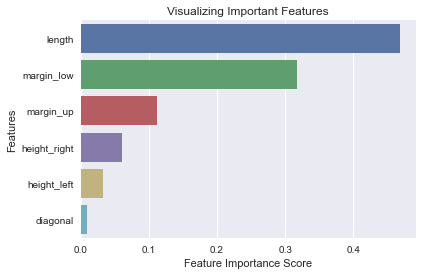

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Les variables les + importantes sont length, margin_low et margin_up. Après avoir réalisé de nouveau le test avec uniquement ces 3 variables, nous sommes en mesure d'améliorer la performance de l'algorithme de 0.001 ...

##### Prédiction sur un nouveau jeu de données

In [97]:
predicted_value = rf.predict(test_scaled)
predicted_proba = rf.predict_proba(test_scaled)
test["prediction"] = predicted_value
test["proba vrai"] = predicted_proba[:,1]
test["prediction"] = test["prediction"].apply(lambda x :"Vrai billet" if x == 1 else "Faux billet" )
test

diagonal  height_left  height_right  margin_low  margin_up  length  \
id                                                                        
A_1    171.76       104.01        103.54        5.21       3.30  111.42   
A_2    171.87       104.17        104.13        6.00       3.31  112.09   
A_3    172.00       104.58        104.29        4.99       3.39  111.57   
A_4    172.49       104.55        104.34        4.44       3.03  113.20   
A_5    171.65       103.63        103.56        3.77       3.16  113.33   

      prediction  proba vrai  
id                            
A_1  Faux billet        0.01  
A_2  Faux billet        0.00  
A_3  Faux billet        0.00  
A_4  Vrai billet        0.97  
A_5  Vrai billet        1.00

In [98]:
filename2 = 'finalized_model_rf.sav'
pickle.dump(rf, open(filename2, 'wb'))

In [99]:
# loaded_model = pickle.load(open(filename2, 'rb'))
# Ypredict = loaded_model.predict(test_scaled)
# # Ypredict

### E. K-means :

In [100]:
from sklearn.cluster import KMeans
from sklearn import decomposition

Le K-Means est un algorithme d'apprentissage automatique non supervisé qui regroupe les données en un nombre k de clusters. Le nombre de clusters est défini par l'utilisateur et l'algorithme essaiera de regrouper les données même si ce nombre n'est pas optimal pour le cas spécifique.

Dans notre cas, nous souhaitons regrouper les billets en 2 groupes : vrai / faux

In [101]:
# Nombre de clusters souhaités
n_clust = 2

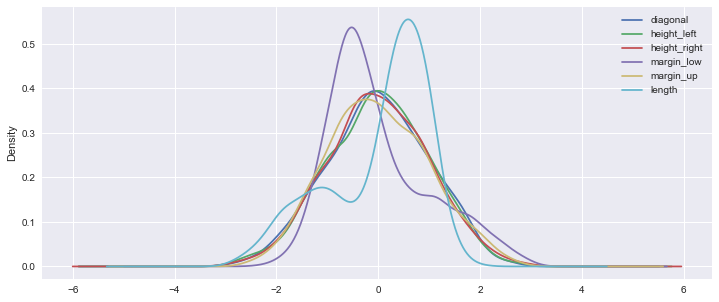

In [102]:
## standardisons nos données d'origines :

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

fig5 = X_scaled.plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.show(fig5)

In [103]:
# Clustering par K-means

km = KMeans(n_clusters=n_clust, random_state=42, max_iter=50)
km.fit(X_scaled)

yc = km.predict(X_scaled)
yc

array([1, 1, 1, ..., 0, 0, 0])

In [104]:
# On peut rajouter les groupes nouvellement crées à notre df :

X_kmean = new_data.copy()

X_kmean['prediction'] = yc
X_kmean

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
5           True    172.17       103.74        104.08        4.42       2.95   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  prediction  
1     113.09           1  
2     113.16           1  
3     113.51           1  
4     112.54           1  
5     112.81           1  
...      ...         ...  
1495  111.28           0  
1496  110.97           0  
1497  111.95           0  
1498  112.25           0  
1499  112.07           0  

[1476 rows x 8 columns]

In [105]:
# estimation des centroïdes

centers = km.cluster_centers_

In [106]:
km.predict(centers)

array([0, 1])

In [107]:
# Récupération des clusters attribués à chaque individu

clusters = km.labels_

In [108]:
km.inertia_

5704.6210246579285

In [109]:
from collections import Counter

Counter(km.labels_)

Counter({1: 997, 0: 479})

Si on compare maintenant avec les données d'origines :

In [110]:
new_data.is_genuine.value_counts()

True     993
False    483
Name: is_genuine, dtype: int64

On constate que l'algorithme de classification non supervisée commet quelques erreurs mais donnes des résultats tout de même intéressants. Regardons les de plus près à l'aide d'une matrice de confusion et d'un rapport de classification pour voir comment le clustering Kmeans a fonctionné sans qu'aucune étiquette ne soit donnée : 

##### Evaluation de l'algorithme

Il n'y a pas de moyen parfait d'évaluer le clustering si nous n'avons pas les étiquettes, cependant dans notre cas, nous disposons des étiquettes (True/False), donc nous en profitons pour évaluer nos clusters :

In [111]:
# On compare nos étiquettes d'origines (is_genuine) avec les étiquettes prédites où 1 = True & 0 = False

print("ConfusionMatrix",confusion_matrix(X_kmean['is_genuine'],km.labels_))
print(classification_report(X_kmean['is_genuine'],km.labels_))

ConfusionMatrix [[470  13]
 [  9 984]]
              precision    recall  f1-score   support

       False       0.98      0.97      0.98       483
        True       0.99      0.99      0.99       993

    accuracy                           0.99      1476
   macro avg       0.98      0.98      0.98      1476
weighted avg       0.99      0.99      0.99      1476



Tout comme les algorithmes de ML, le K-means donne d'excellent résultats mais présente néanmoins un taux de recall légèrement plus élevé.

### Analyse en composantes principales (ACP)

L'analyse en composantes principales est l'une des méthodes d'analyse de données multivariées les plus fréquemment utilisées. Elle permet d'étudier des ensembles de données multidimensionnelles avec des variables quantitatives. Il s'agit d'une méthode de projection car elle projette les observations d'un espace à p dimensions avec p variables vers un espace à k dimensions (où k < p) de manière à conserver le maximum d'information (l'information est mesurée ici par la variance totale de l'ensemble de données) des dimensions initiales.

In [112]:
pca = decomposition.PCA().fit(X_scaled)

In [113]:
centroids_projected = pca.transform(centers)

In [114]:
X_projected = pca.transform(X_scaled)

In [115]:
X_projected

array([[-2.03049358, -2.22229023, -1.00639874,  0.02494367,  0.0226031 ,
        -0.48280363],
       [-0.94123925,  2.67537983,  1.26002823,  0.83989953, -0.82428503,
         0.1958916 ],
       [-1.38775737, -1.86070517,  0.59754913, -0.83350573,  0.82803365,
        -0.23394752],
       ...,
       [ 1.95770086, -0.62218589, -0.54597208,  0.14712569, -0.35050371,
         0.53672686],
       [ 1.8534811 ,  0.51560615,  0.02678825,  0.4612629 ,  0.33262269,
         0.55023545],
       [ 1.08119317, -1.48803396,  0.49055496,  0.69735697,  0.5072756 ,
        -0.23584931]])

Les coordonnées factorielles des individus ont été collectées dans la variable X_projected. Nous les positionnons dans le premier plan factoriel pour situer et comprendre les proximités entre les groupes

###### Ebouli des valeurs propres

Dans une ACP, on projette les données sur les axes principaux d’inertie, et que ceux-ci sont ordonnés selon l’inertie du nuage projeté : de la plus grande à la plus petite. Quand on additionne les inerties associées à tous les axes, on obtient l’inertie totale du nuage des individus. On peut donc afficher un diagramme qui décrit le pourcentage d’inertie totale associé à chaque axe. On appelle ce diagramme l’éboulis des valeurs propres. 

In [116]:
scree = pca.explained_variance_ratio_
scree

array([0.43214724, 0.16967179, 0.13002436, 0.11875882, 0.09588415,
       0.05351364])

In [117]:
pca.explained_variance_ratio_.cumsum()

array([0.43214724, 0.60181902, 0.73184339, 0.85060221, 0.94648636,
       1.        ])

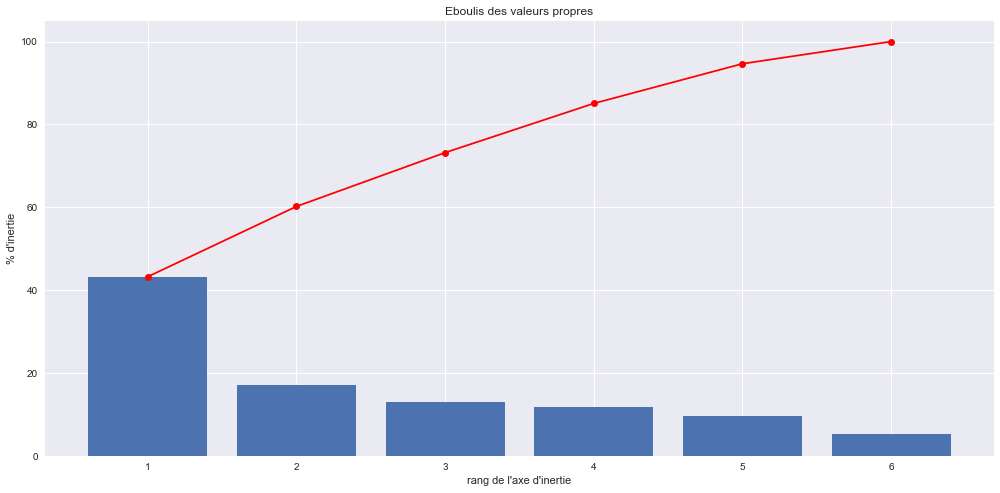

In [118]:
(fig7, ax) = plt.subplots(figsize=(17, 8))
scree = pca.explained_variance_ratio_*100
ax.bar(np.arange(len(scree))+1, scree)
ax.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
ax.set_xlabel("rang de l'axe d'inertie")
ax.set_ylabel("% d'inertie")
ax.set_title("Eboulis des valeurs propres")
plt.show(block=False)

Les barres bleues montrent le pourcentage de variance expliqué par chaque composante principale (ceci provient de pca.explained_variance_ratio_).  La ligne rouge montre la somme cumulative (provenant de pca.explained_variance_ratio_.cumsum()).

À partir du scree plot, nous pouvons lire le pourcentage de la variance dans les données expliquée lorsque nous ajoutons des composantes principales. Ainsi, la première composante principale explique 38% de la variance de l'ensemble des données. Les 2 premières composantes principales expliquent 60%, les 3 premières expliquent 75%, et ainsi de suite.

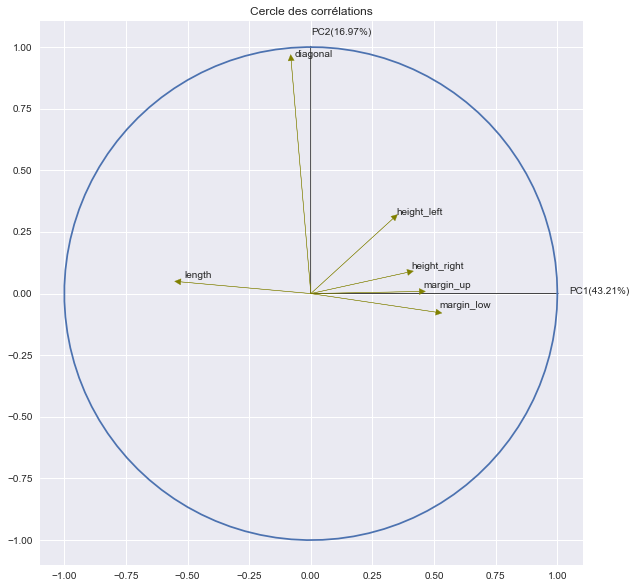

In [119]:
(fig8, ax) = plt.subplots(figsize=(10, 10))

# axe PC1
ax.arrow(0, 0, 1, 0, color='black')
plt.text(1 + 0.05, 0, f'PC1({round(scree[0],2)}%)')

# axe PC2
ax.arrow(0, 0, 0, 1, color='black')
ax.text(0, 1 + 0.05, f'PC2({round(scree[1],2)}%)')

for i in range(0, pca.components_.shape[1]):
    ax.arrow(0, 0,  pca.components_[0, i], pca.components_[1, i], head_width=0.025, head_length=0.025, color='olive')

    ax.text(pca.components_[0, i] + 0.015, pca.components_[1, i] + 0.015, X_scaled.columns.values[i])
    
an = np.linspace(0, 2 * np.pi, 100)
ax.plot(np.cos(an), np.sin(an))  # cercle trigonométrique
ax.set_aspect('equal', adjustable='box')
ax.set_title('Cercle des corrélations')
plt.show(fig8)

Le cercle de corrélation montre des vecteurs pointant vers l'extérieur de l'origine pour représenter les variables originales. L'angle entre les vecteurs est une approximation de la corrélation entre les variables. Un petit angle indique que les variables sont positivement corrélées, un angle de 90 degrés indique que les variables ne sont pas corrélées, et un angle proche de 180 degrés indique que les variables sont négativement corrélées.

###### Projection des individus

In [120]:
color_dict = {True: 'burlywood', False: 'powderblue'}

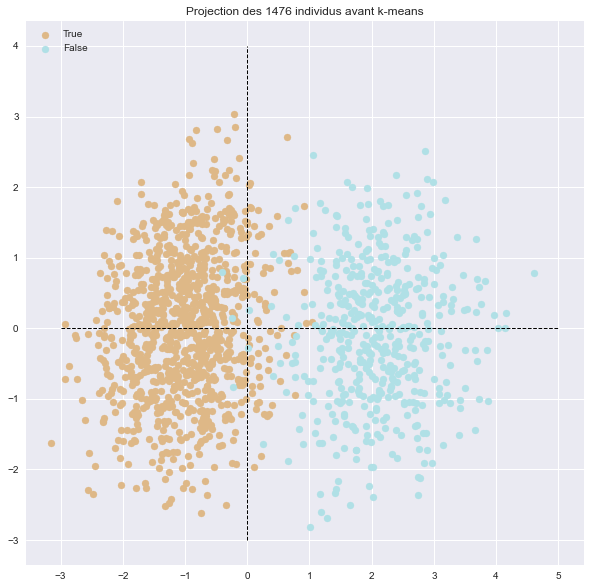

In [121]:
# Affichage du clustering par projection des individus + centroïdes en rouge avant K-means

fig10, ax = plt.subplots(figsize=(10,10))

for i, (target, target_color) in enumerate(color_dict.items()):
    indicesToKeep = new_data['is_genuine'] == bool(target)
    ind = new_data.reset_index().index[indicesToKeep]
    ax.scatter(X_projected[ind,0],X_projected[ind,1], c=target_color, label=target) 
    
plt.title("Projection des {} individus avant k-means".format(X_projected.shape[0]))

#ajouter les axes
ax.plot([-3,5],[0,0],color='black',linestyle='--',linewidth=1)
ax.plot([0,0],[-3,4],color='black',linestyle='--',linewidth=1)

ax.legend(frameon=False, loc='upper left', ncol=1)

plt.show()

In [122]:
color_dict2 = {'Vrai billet': 'burlywood', 'Faux billet': 'powderblue'}

In [123]:
X_kmean["prediction"] = X_kmean["prediction"].apply(lambda x :"Vrai billet" if x == 1 else "Faux billet" )
X_kmean

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
5           True    172.17       103.74        104.08        4.42       2.95   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length   prediction  
1     113.09  Vrai billet  
2     113.16  Vrai billet  
3     113.51  Vrai billet  
4     112.54  Vrai billet  
5     112.81  Vrai billet  
...      ...          ...  
1495  111.28  Faux billet  
1496  110.97  Faux billet  
1497  111.95  Faux billet  
1498  112.25  Faux billet  
1499  112.07  Faux billet  

[1476 rows x 8 columns]

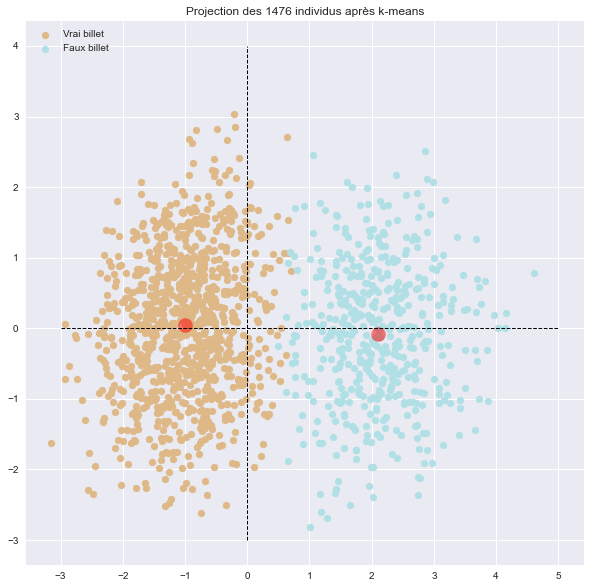

In [124]:
# Affichage du clustering par projection des individus + centroïdes en rouge après K-means

fig10, ax = plt.subplots(figsize=(10,10))

for i, (target, target_color) in enumerate(color_dict2.items()):
    indicesToKeep = X_kmean['prediction'] == str(target)
    ind = X_kmean.reset_index().index[indicesToKeep]
    ax.scatter(X_projected[ind,0],X_projected[ind,1], c=target_color, label=target) 
    
    
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1], c='red', s=200, alpha=0.5);
plt.title("Projection des {} individus après k-means".format(X_projected.shape[0]))

#ajouter les axes
ax.plot([-3,5],[0,0],color='black',linestyle='--',linewidth=1)
ax.plot([0,0],[-3,4],color='black',linestyle='--',linewidth=1)

ax.legend(frameon=False, loc='upper left', ncol=1)

plt.show()

In [125]:
# idem mais avec la librairie plotly : 

import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

fig = px.scatter(components, x=0, y=1, color=new_data['is_genuine'], title = "Répartition des individus avant k-means")
fig.show()

In [126]:
fig = px.scatter(components, x=0, y=1, color=X_kmean['prediction'], title = "Répartition des individus après k-means")
 
fig.show()

On observe bien la présence de 2 groupes distincts qui nous permettent de distinguer les vrais des faux billets.